<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_2)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-2'

In [4]:
os.listdir(base_path)

['data_add_delta_-2_n20.csv',
 'data_add_delta_-2_n30.csv',
 'data_add_delta_-2_n60.csv',
 'data_add_delta_-2_n120.csv',
 'data_add_delta_-2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,72.166235,80.390229,71.798709,-0.000213,234.354961,234.355143,-0.000183
1,0.0,1.0,57.385642,83.160523,69.041327,0.000036,219.587528,219.587489,0.000039
2,0.0,2.0,71.139582,32.969847,85.777632,-0.001545,199.885516,199.887026,-0.001510
3,0.0,3.0,25.485235,73.184887,43.427574,-0.000200,152.097495,152.097753,-0.000258
4,0.0,4.0,22.160894,85.787528,29.426578,-0.000180,147.374820,147.375068,-0.000248
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,90.600210,52.176987,30.749585,0.000272,183.527054,183.526744,0.000310
249996,999.0,246.0,86.223401,42.229539,76.333679,0.000071,214.786689,214.786629,0.000061
249997,999.0,247.0,26.892257,20.591483,94.937225,-0.002626,152.418340,152.420830,-0.002491
249998,999.0,248.0,27.051588,66.741768,90.616908,0.000036,194.410300,194.410238,0.000063


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,72.166235,80.390229,71.798709,-0.000213,234.354961,234.355143,-0.000183
1,0.0,1.0,57.385642,83.160523,69.041327,0.000036,219.587528,219.587489,0.000039
2,0.0,2.0,71.139582,32.969847,85.777632,-0.001545,199.885516,199.887026,-0.001510
3,0.0,3.0,25.485235,73.184887,43.427574,-0.000200,152.097495,152.097753,-0.000258
4,0.0,4.0,22.160894,85.787528,29.426578,-0.000180,147.374820,147.375068,-0.000248
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,90.600210,52.176987,30.749585,0.000272,183.527054,183.526744,0.000310
249996,999.0,246.0,86.223401,42.229539,76.333679,0.000071,214.786689,214.786629,0.000061
249997,999.0,247.0,26.892257,20.591483,94.937225,-0.002626,152.418340,152.420830,-0.002491
249998,999.0,248.0,27.051588,66.741768,90.616908,0.000036,194.410300,194.410238,0.000063


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    72.166235  80.390229  71.798709  ...  234.354961  234.355143 -0.000183
      1.0    57.385642  83.160523  69.041327  ...  219.587528  219.587489  0.000039
      2.0    71.139582  32.969847  85.777632  ...  199.885516  199.887026 -0.001510
      3.0    25.485235  73.184887  43.427574  ...  152.097495  152.097753 -0.000258
      4.0    22.160894  85.787528  29.426578  ...  147.374820  147.375068 -0.000248
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  90.600210  52.176987  30.749585  ...  183.527054  183.526744  0.000310
      246.0  86.223401  42.229539  76.333679  ...  214.786689  214.786629  0.000061
      247.0  26.892257  20.591483  94.937225  ...  152.418340  152.420830 -0.002491
      248.0  27.051588  66.741768  90.616908  ...  194.410300  194.410238  0.000063
      249.0  72.855144  56.176897  44.056888  ...  183.088873  183.088888 -0.000015

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    72.166235  80.390229  71.798709  ...  234.354961  234.355143 -0.000183
      1.0    57.385642  83.160523  69.041327  ...  219.587528  219.587489  0.000039
      2.0    71.139582  32.969847  85.777632  ...  199.885516  199.887026 -0.001510
      3.0    25.485235  73.184887  43.427574  ...  152.097495  152.097753 -0.000258
      4.0    22.160894  85.787528  29.426578  ...  147.374820  147.375068 -0.000248
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  90.600210  52.176987  30.749585  ...  183.527054  183.526744  0.000310
      246.0  86.223401  42.229539  76.333679  ...  214.786689  214.786629  0.000061
      247.0  26.892257  20.591483  94.937225  ...  152.418340  152.420830 -0.002491
      248.0  27.051588  66.741768  90.616908  ...  194.410300  194.410238  0.000063
      249.0  72.855144  56.176897  44.056888  ...  183.088873  183.088888 -0.000015

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,72.166235,80.390229,71.798709,-0.000213,234.354961,234.355143,-0.000183
1,0.0,1.0,57.385642,83.160523,69.041327,0.000036,219.587528,219.587489,0.000039
2,0.0,2.0,71.139582,32.969847,85.777632,-0.001545,199.885516,199.887026,-0.001510
3,0.0,3.0,25.485235,73.184887,43.427574,-0.000200,152.097495,152.097753,-0.000258
4,0.0,4.0,22.160894,85.787528,29.426578,-0.000180,147.374820,147.375068,-0.000248
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,90.600210,52.176987,30.749585,0.000272,183.527054,183.526744,0.000310
249996,999.0,246.0,86.223401,42.229539,76.333679,0.000071,214.786689,214.786629,0.000061
249997,999.0,247.0,26.892257,20.591483,94.937225,-0.002626,152.418340,152.420830,-0.002491
249998,999.0,248.0,27.051588,66.741768,90.616908,0.000036,194.410300,194.410238,0.000063


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    72.166235  80.390229  71.798709  ...  234.354961  234.355143 -0.000183
      1.0    57.385642  83.160523  69.041327  ...  219.587528  219.587489  0.000039
      2.0    71.139582  32.969847  85.777632  ...  199.885516  199.887026 -0.001510
      3.0    25.485235  73.184887  43.427574  ...  152.097495  152.097753 -0.000258
      4.0    22.160894  85.787528  29.426578  ...  147.374820  147.375068 -0.000248
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  90.600210  52.176987  30.749585  ...  183.527054  183.526744  0.000310
      246.0  86.223401  42.229539  76.333679  ...  214.786689  214.786629  0.000061
      247.0  26.892257  20.591483  94.937225  ...  152.418340  152.420830 -0.002491
      248.0  27.051588  66.741768  90.616908  ...  194.410300  194.410238  0.000063
      249.0  72.855144  56.176897  44.056888  ...  183.088873  183.088888 -0.000015

[250000 rows x 7 columns]

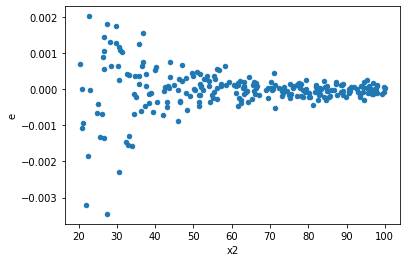

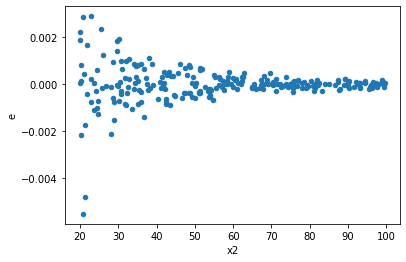

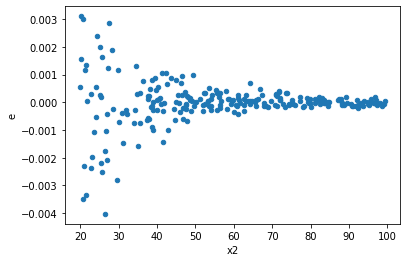

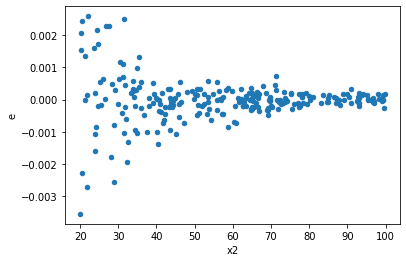

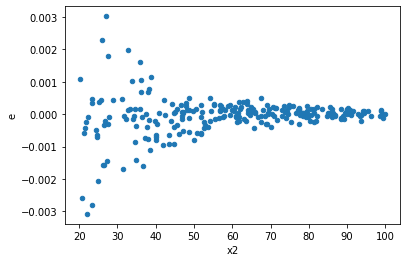

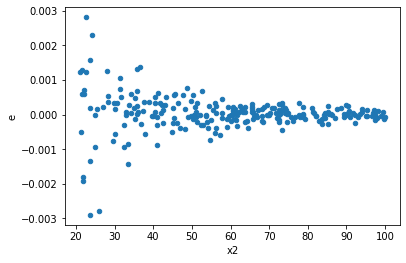

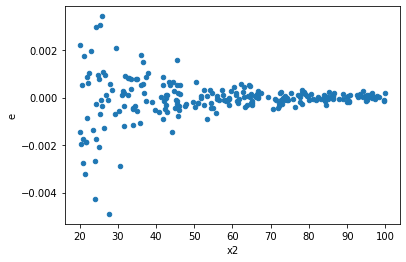

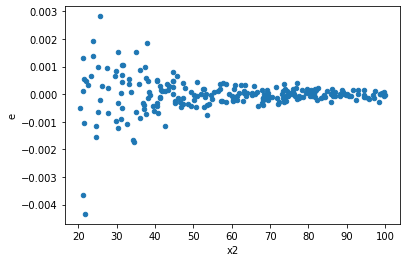

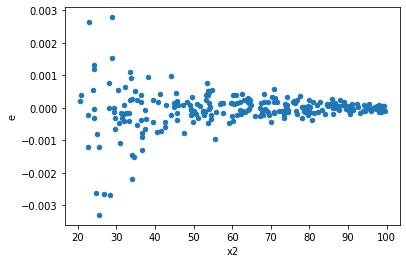

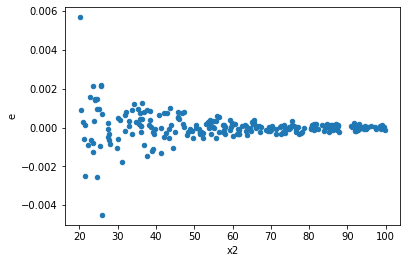

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,1.8655360524216018e-06,8.127940140732293e-05,1.9432667212725018e-08,8.466604313262805e-07,0.02295213818163682,4.686194675254565e-53,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,2.2038658458822177e-06,0.0001382995878895855,2.2956935894606434e-08,1.4406207071831822e-06,0.015935447672061915,1.8601702733756743e-60,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,2.0489925814057418e-06,0.00015487091876302281,2.1343672722976476e-08,1.613238737114821e-06,0.013230324955591096,2.8911801888851e-64,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,3.289772854310291e-06,0.00010959212019009563,3.426846723239886e-08,1.141584585313496e-06,0.03001833387842061,1.096873350671311e-47,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,2.0859466752462247e-06,7.941533589785925e-05,2.1728611200481506e-08,8.272430822693672e-07,0.026266295441085632,2.3894401490413737e-50,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,2.0598646123407786e-06,6.682221722204979e-05,2.1456923045216445e-08,6.960647627296853e-07,0.030826044061002377,3.690498633573375e-47,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,2.340678141755882e-06,0.0001774784522856367,2.4382063976623773e-08,1.848733877975382e-06,0.013188520136454407,2.4895290099856472e-64,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,1.941023601053231e-06,8.781246442803542e-05,2.021899584430449e-08,9.14713171125369e-07,0.022104192311376822,8.16829613014455e-54,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,2.622586108463425e-06,8.056052749945104e-05,2.731860529649401e-08,8.39172161452615e-07,0.03255423207700938,4.435428238812063e-46,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64